In [1]:
#Load libraries
import os
import pandas as pd
import numpy as np
from fancyimpute import KNN   
import matplotlib.pyplot as plt
import seaborn as sns
from random import randrange, uniform


Using TensorFlow backend.


In [2]:
#Set working directory
os.chdir("C:/Users/vrush_000/Desktop/Data science/Project/Main Project/Absenteeism")

In [3]:
#check working directory
os.getcwd()

'C:\\Users\\vrush_000\\Desktop\\Data science\\Project\\Main Project\\Absenteeism'

In [4]:
#Load data
absent_train = pd.read_excel("Absenteeism_at_work_Project.xls")

In [5]:
#Dimension of data
absent_train.shape

(740, 21)

In [6]:
#First five rows of dataset
absent_train.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [7]:
#Replace spaces in column names with _
absent_train.columns = absent_train.columns.str.replace(' ', '_')

In [8]:
##Expore the dataset
#dimension of dataset
absent_train.shape

(740, 21)

In [9]:
#structure of data
absent_train.dtypes

ID                                   int64
Reason_for_absence                 float64
Month_of_absence                   float64
Day_of_the_week                      int64
Seasons                              int64
Transportation_expense             float64
Distance_from_Residence_to_Work    float64
Service_time                       float64
Age                                float64
Work_load_Average/day_             float64
Hit_target                         float64
Disciplinary_failure               float64
Education                          float64
Son                                float64
Social_drinker                     float64
Social_smoker                      float64
Pet                                float64
Weight                             float64
Height                             float64
Body_mass_index                    float64
Absenteeism_time_in_hours          float64
dtype: object

In [10]:
#No. of unique value in each column
absent_train.nunique()

ID                                 36
Reason_for_absence                 28
Month_of_absence                   13
Day_of_the_week                     5
Seasons                             4
Transportation_expense             24
Distance_from_Residence_to_Work    25
Service_time                       18
Age                                22
Work_load_Average/day_             38
Hit_target                         13
Disciplinary_failure                2
Education                           4
Son                                 5
Social_drinker                      2
Social_smoker                       2
Pet                                 6
Weight                             26
Height                             14
Body_mass_index                    17
Absenteeism_time_in_hours          19
dtype: int64

In [11]:
#summary of each numerical variable
absent_train.describe()

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
count,740.000000,737.000000,739.000000,740.000000,740.000000,733.000000,737.000000,737.000000,737.000000,730.000000,...,734.000000,730.000000,734.000000,737.000000,736.000000,738.000000,739.000000,726.000000,709.000000,718.000000
mean,18.017568,19.188602,6.319350,3.914865,2.544595,221.035471,29.667571,12.565807,36.449118,271188.860274,...,0.053134,1.295890,1.017711,0.567164,0.073370,0.746612,79.063599,172.152893,26.684062,6.977716
std,11.021247,8.437493,3.435948,1.421675,1.111831,66.954179,14.848124,4.389813,6.480148,38981.880873,...,0.224453,0.676965,1.094928,0.495805,0.260919,1.319726,12.868630,6.081065,4.292819,13.476962
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,284853.000000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [12]:
#categorical variable list
cat_names = ["ID","Reason_for_absence","Month_of_absence","Day_of_the_week","Seasons","Disciplinary_failure","Education","Social_drinker","Social_smoker"]

cat_names

['ID',
 'Reason_for_absence',
 'Month_of_absence',
 'Day_of_the_week',
 'Seasons',
 'Disciplinary_failure',
 'Education',
 'Social_drinker',
 'Social_smoker']

In [13]:
#conversion of datatype of variable 
for i in cat_names:
    #print(i)
    absent_train[i] = absent_train[i].astype(object)


#Checking datatypes of variables
absent_train.dtypes

ID                                  object
Reason_for_absence                  object
Month_of_absence                    object
Day_of_the_week                     object
Seasons                             object
Transportation_expense             float64
Distance_from_Residence_to_Work    float64
Service_time                       float64
Age                                float64
Work_load_Average/day_             float64
Hit_target                         float64
Disciplinary_failure                object
Education                           object
Son                                float64
Social_drinker                      object
Social_smoker                       object
Pet                                float64
Weight                             float64
Height                             float64
Body_mass_index                    float64
Absenteeism_time_in_hours          float64
dtype: object

In [14]:
#summary of each numerical variable
absent_train.describe()

,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,Hit_target,Son,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
count,733.000000,737.000000,737.000000,737.000000,730.000000,734.000000,734.000000,738.000000,739.000000,726.000000,709.000000,718.000000
mean,221.035471,29.667571,12.565807,36.449118,271188.860274,94.587193,1.017711,0.746612,79.063599,172.152893,26.684062,6.977716
std,66.954179,14.848124,4.389813,6.480148,38981.880873,3.792705,1.094928,1.319726,12.868630,6.081065,4.292819,13.476962
min,118.000000,5.000000,1.000000,27.000000,205917.000000,81.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,179.000000,16.000000,9.000000,31.000000,244387.000000,93.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,225.000000,26.000000,13.000000,37.000000,264249.000000,95.000000,1.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,260.000000,50.000000,16.000000,40.000000,284853.000000,97.000000,2.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,388.000000,52.000000,29.000000,58.000000,378884.000000,100.000000,4.000000,8.000000,108.000000,196.000000,38.000000,120.000000


# Missing Value Analysis

In [15]:
#checking for missing values and buiding dataframe of missing value percentage
Missing_value = absent_train.isnull().sum().to_frame()
#rename columnns of missing_value object
Missing_value = Missing_value.rename(columns = {"index":"Var",0:"Missing_perc"})
#Create a new column with missing value percentage
Missing_value["Missing_perc"] = (Missing_value["Missing_perc"]/len(absent_train)) * 100
#Sort missing value percentage in descending order
Missing_value = Missing_value.sort_values("Missing_perc",ascending = False)
#Store misssing value file into the system
Missing_value.to_csv("Missing_value.csv",index = False)

Missing_value

,Missing_perc
Body_mass_index,4.189189
Absenteeism_time_in_hours,2.972973
Height,1.891892
Work_load_Average/day_,1.351351
Education,1.351351
Transportation_expense,0.945946
Son,0.810811
Disciplinary_failure,0.810811
Hit_target,0.810811
Social_smoker,0.540541


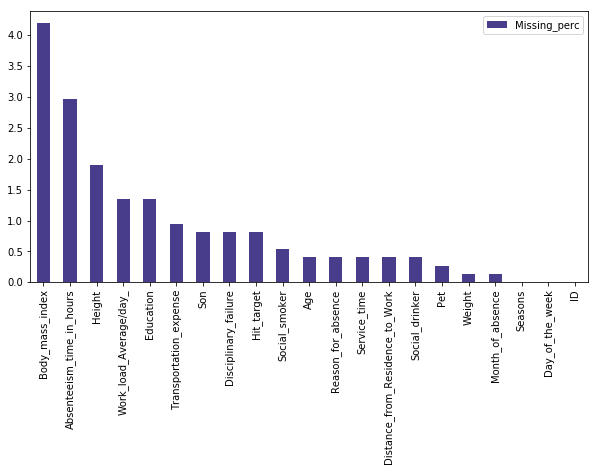

In [16]:
#Visualisation of missing value percentage in each column
Missing_value.plot(kind = 'bar',figsize = (10,5),color = 'darkslateblue')

In [17]:
#For Reason.for.absence 
#list of ID's corresponding to missing value in Reason.for.absence
list(absent_train["ID"].loc[absent_train["Reason_for_absence"].isnull()])

#Imputing with mode
for i in [3,20,6]:
    #print(i)
    absent_train["Reason_for_absence"].loc[(absent_train["Reason_for_absence"].isnull()) & (absent_train["ID"] == i)] = absent_train.loc[absent_train['ID']==i,'Reason_for_absence'].mode()[0]
    absent_train["Reason_for_absence"].loc[absent_train["Reason_for_absence"] == 0] = 26

C:\Users\vrush_000\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [18]:
#For Month.of.absence
#Impute with reference of Seasons column
absent_train["Month_of_absence"].loc[absent_train["Month_of_absence"].isnull()] = 10


C:\Users\vrush_000\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [19]:
#creating pivot table for Month.of.absence and Seasons
absent_train.groupby(['Month_of_absence','Seasons']).size()

Month_of_absence  Seasons
0.0               1           1
                  2           1
                  3           1
1.0               2          50
2.0               2          72
3.0               2          60
                  3          27
4.0               3          53
5.0               3          64
6.0               1          16
                  3          38
7.0               1          67
8.0               1          54
9.0               1          32
                  4          21
10.0              4          71
11.0              4          63
12.0              2           9
                  4          40
dtype: int64

In [20]:
#Imputing 0 values in Month.of.absence with refernce to Seasons
absent_train["Month_of_absence"].loc[(absent_train["Month_of_absence"] == 0) & (absent_train["Seasons"] == 1)] = 7
absent_train["Month_of_absence"].loc[(absent_train["Month_of_absence"] == 0) & (absent_train["Seasons"] == 2)] = 2
absent_train["Month_of_absence"].loc[(absent_train["Month_of_absence"] == 0) & (absent_train["Seasons"] == 3)] = 5

C:\Users\vrush_000\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [21]:
#For Transportation.expense
#imputing with mean vaue of transportation expense for a paticular ID
list(absent_train["ID"].loc[(absent_train["Transportation_expense"].isnull())])

[10, 3, 1, 15, 20, 22, 20]

In [22]:
for i in [10,3,1,15,20,22]:
    #print(i)
    absent_train["Transportation_expense"].loc[(absent_train["Transportation_expense"].isnull()) & (absent_train["ID"] == i)] = absent_train["Transportation_expense"].loc[absent_train["ID"] == i].mean()

C:\Users\vrush_000\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [23]:
#For Distance.from.Residense.to.work
#Imputing with mean value with refernce to the ID
list(absent_train["ID"].loc[(absent_train["Distance_from_Residence_to_Work"].isnull())])

[34, 22, 28]

In [24]:
for i in [34,22,28]:
    #print(i)
    absent_train["Distance_from_Residence_to_Work"].loc[(absent_train["Distance_from_Residence_to_Work"].isnull()) & (absent_train["ID"] == i)] = absent_train["Distance_from_Residence_to_Work"].loc[absent_train["ID"] == i].mean()

C:\Users\vrush_000\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [25]:
#For Service.time
#Imputing with mean value with refernce to the ID
list(absent_train["ID"].loc[(absent_train["Service_time"].isnull())])

[28, 34, 34]

In [26]:
for i in [28,34]:
    #print(i)
    absent_train["Service_time"].loc[(absent_train["Service_time"].isnull()) & (absent_train["ID"] == i)] = absent_train["Service_time"].loc[absent_train["ID"] == i].mean()

C:\Users\vrush_000\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [27]:
#For Age
#Imputing with mean value with refernce to the ID
list(absent_train["ID"].loc[(absent_train["Age"].isnull())])

[28, 24, 24]

In [28]:
for i in [24,28]:
    #print(i)
    absent_train["Age"].loc[(absent_train["Age"].isnull()) & (absent_train["ID"] == i)] = absent_train["Age"].loc[absent_train["ID"] == i].mean()

C:\Users\vrush_000\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [29]:
#For Height
#Imputing with mean value with refernce to the ID
H_id = list(absent_train["ID"].loc[(absent_train["Height"].isnull())])

In [30]:
for i in H_id:
    #print(i)
    absent_train["Height"].loc[(absent_train["Height"].isnull()) & (absent_train["ID"] == i)] = absent_train["Height"].loc[absent_train["ID"] == i].mean()

C:\Users\vrush_000\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [31]:
#For work.load.average.day
#Imputing with mean value with refernce to the ID
w_id = list(absent_train["ID"].loc[(absent_train["Work_load_Average/day_"].isnull())])

In [32]:
for i in w_id:
    #print(i)
    absent_train["Work_load_Average/day_"].loc[(absent_train["Work_load_Average/day_"].isnull()) & (absent_train["ID"] == i)] = absent_train["Work_load_Average/day_"].loc[absent_train["ID"] == i].mean()

C:\Users\vrush_000\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [33]:
#For Hit.target
#Imputing with mean value with refernce to the ID
T_id = list(absent_train["ID"].loc[(absent_train["Hit_target"].isnull())])

In [34]:
for i in T_id:
    #print(i)
    absent_train["Hit_target"].loc[(absent_train["Hit_target"].isnull()) & (absent_train["ID"] == i)] = absent_train["Hit_target"].loc[absent_train["ID"] == i].mean()

C:\Users\vrush_000\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [35]:
#For Disciplinary.failure
list(absent_train["ID"].loc[absent_train["Disciplinary_failure"].isnull()])

[20, 10, 34, 22, 34, 10]

In [36]:
for i in [10,20,22,34]:
    #print(i)
    absent_train["Disciplinary_failure"].loc[(absent_train["Disciplinary_failure"].isnull()) & (absent_train["ID"] == i)] = absent_train.loc[absent_train['ID']==i,'Disciplinary_failure'].mode()[0]


C:\Users\vrush_000\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [37]:
#For Education
E_id = list(absent_train["ID"].loc[absent_train["Education"].isnull()])

In [38]:
for i in E_id:
    #print(i)
    absent_train["Education"].loc[(absent_train["Education"].isnull()) & (absent_train["ID"] == i)] = absent_train.loc[absent_train['ID']==i,'Education'].mode()[0]


C:\Users\vrush_000\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [39]:
#For son
list(absent_train["ID"].loc[absent_train["Son"].isnull()])


[20, 14, 34, 34, 27, 1]

In [40]:
absent_train.groupby(['Son','ID']).size()

Son  ID
0.0  3     113
     18     16
     19      3
     21      3
     22     46
     24     30
     25     10
     27      6
     30      7
     31      3
     32      5
     34     53
1.0  1      22
     2       6
     4       1
     5      19
     10     24
     12      7
     15     37
     28     76
     29      1
     35      1
     36     34
2.0  6       8
     7       6
     8       2
     9       8
     11     40
     14     28
     16      2
     17     20
     23      8
     26      5
     29      4
     33     24
3.0  13     15
4.0  20     41
dtype: int64

In [41]:
absent_train["Son"].loc[(absent_train["Son"].isnull()) & (absent_train["ID"] == 1)] = 1
absent_train["Son"].loc[(absent_train["Son"].isnull()) & (absent_train["ID"] == 14)] = 2
absent_train["Son"].loc[(absent_train["Son"].isnull()) & (absent_train["ID"] == 20)] = 4
absent_train["Son"].loc[(absent_train["Son"].isnull()) & (absent_train["ID"] == 27)] = 0
absent_train["Son"].loc[(absent_train["Son"].isnull()) & (absent_train["ID"] == 34)] = 0

C:\Users\vrush_000\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [42]:
#For Social.drinker
list(absent_train["ID"].loc[absent_train["Social_drinker"].isnull()])

[10, 14, 17]

In [43]:
for i in (10,14,17):
    #print(i)
    absent_train["Social_drinker"].loc[(absent_train["Social_drinker"].isnull()) & (absent_train["ID"] == i)] = absent_train.loc[absent_train['ID']==i,'Social_drinker'].mode()[0]


C:\Users\vrush_000\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [44]:
#For social.smoker
list(absent_train["ID"].loc[absent_train["Social_smoker"].isnull()])

[34, 1, 11, 15]

In [45]:
for i in (1,11,15,34):
    #print(i)
    absent_train["Social_smoker"].loc[(absent_train["Social_smoker"].isnull()) & (absent_train["ID"] == i)] = absent_train.loc[absent_train['ID']==i,'Social_smoker'].mode()[0]


C:\Users\vrush_000\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [46]:
#For Pet
list(absent_train["ID"].loc[absent_train["Pet"].isnull()])

[1, 13]

In [47]:
absent_train.groupby(['Pet','ID']).size()

Pet  ID
0.0  3     113
     5      19
     7       6
     13     14
     14     29
     16      2
     17     20
     18     16
     19      3
     20     42
     21      3
     22     46
     24     30
     25     10
     27      7
     30      7
     31      3
     34     55
     36     34
1.0  1      22
     9       8
     11     40
     15     37
     26      5
     33     24
     35      1
2.0  6       8
     8       2
     28     76
     29      5
     32      5
4.0  10     24
     23      8
5.0  2       6
8.0  4       1
     12      7
dtype: int64

In [48]:
absent_train["Pet"].loc[(absent_train["Pet"].isnull()) & (absent_train["ID"] == 1)] = 1
absent_train["Pet"].loc[(absent_train["Pet"].isnull()) & (absent_train["ID"] == 13)] = 0

C:\Users\vrush_000\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [49]:
#For Weight
#For Pet
list(absent_train["ID"].loc[absent_train["Weight"].isnull()])

[27]

In [50]:
absent_train["Weight"].loc[(absent_train["Weight"].isnull()) & (absent_train["ID"] == 27)] = absent_train["Weight"].loc[absent_train["ID"] == 27].mean()

C:\Users\vrush_000\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [51]:
B_id = list(absent_train["ID"].loc[absent_train["Body_mass_index"].isnull()])

In [52]:
for i in B_id:
    absent_train["Body_mass_index"].loc[(absent_train["Body_mass_index"].isnull()) & (absent_train["ID"] == i)] = absent_train["Body_mass_index"].loc[absent_train["ID"] == i].mean()

C:\Users\vrush_000\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [53]:
#check for missing value in each column
absent_train.isnull().sum()

ID                                  0
Reason_for_absence                  0
Month_of_absence                    0
Day_of_the_week                     0
Seasons                             0
Transportation_expense              0
Distance_from_Residence_to_Work     0
Service_time                        0
Age                                 0
Work_load_Average/day_              0
Hit_target                          0
Disciplinary_failure                0
Education                           0
Son                                 0
Social_drinker                      0
Social_smoker                       0
Pet                                 0
Weight                              0
Height                              0
Body_mass_index                     0
Absenteeism_time_in_hours          22
dtype: int64

In [54]:
#absent_train.iloc[2,20] = np.nan

In [55]:
#Actual value = 2
#Mean value = 2.86
#Median method = 2
#knn method = 4
#we selected median method as it gives close value to actual value as compared to other method

In [56]:
#list of reason for absence corresponding to absenteeism time in hours
T_reason = list(absent_train["Reason_for_absence"].loc[absent_train["Absenteeism_time_in_hours"].isnull()])

In [57]:
#Impute with mean
#for i in T_reason:
 #   absent_train["Absenteeism_time_in_hours"].loc[(absent_train["Absenteeism_time_in_hours"].isnull()) & (absent_train["Reason_for_absence"] == i)] = absent_train["Absenteeism_time_in_hours"].loc[absent_train["Reason_for_absence"] == i].mean()


#Impute with median
for i in T_reason:
    absent_train["Absenteeism_time_in_hours"].loc[(absent_train["Absenteeism_time_in_hours"].isnull()) & (absent_train["Reason_for_absence"] == i)] = absent_train["Absenteeism_time_in_hours"].loc[absent_train["Reason_for_absence"] == i].median()


#Apply KNN imputation algorithm
#absent_train = pd.DataFrame(KNN(k = 3).fit_transform(absent_train), columns = absent_train.columns)

C:\Users\vrush_000\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [58]:
#Checking if any missing value present
absent_train.isnull().sum()

ID                                 0
Reason_for_absence                 0
Month_of_absence                   0
Day_of_the_week                    0
Seasons                            0
Transportation_expense             0
Distance_from_Residence_to_Work    0
Service_time                       0
Age                                0
Work_load_Average/day_             0
Hit_target                         0
Disciplinary_failure               0
Education                          0
Son                                0
Social_drinker                     0
Social_smoker                      0
Pet                                0
Weight                             0
Height                             0
Body_mass_index                    0
Absenteeism_time_in_hours          0
dtype: int64

In [59]:
#Rechecking datatypes of variable
absent_train.dtypes

ID                                  object
Reason_for_absence                  object
Month_of_absence                    object
Day_of_the_week                     object
Seasons                             object
Transportation_expense             float64
Distance_from_Residence_to_Work    float64
Service_time                       float64
Age                                float64
Work_load_Average/day_             float64
Hit_target                         float64
Disciplinary_failure                 int64
Education                            int64
Son                                float64
Social_drinker                       int64
Social_smoker                        int64
Pet                                float64
Weight                             float64
Height                             float64
Body_mass_index                    float64
Absenteeism_time_in_hours          float64
dtype: object

In [60]:
#conversion of datatypes
#categorical variable list
cat_names = ["ID","Reason_for_absence","Month_of_absence","Day_of_the_week","Seasons","Disciplinary_failure","Education","Social_drinker","Social_smoker"]

#conversion of datatype of variable 
for i in cat_names:
    absent_train[i] = absent_train[i].astype(object)

#Numerical variable list
cnames = ["Transportation_expense","Distance_from_Residence_to_Work","Service_time","Age","Work_load_Average/day_","Hit_target","Son","Pet","Weight","Height","Body_mass_index","Absenteeism_time_in_hours"]
for i in cnames:
    absent_train[i] = absent_train[i].astype(int)

#Checking datatypes of variables
absent_train.dtypes

ID                                 object
Reason_for_absence                 object
Month_of_absence                   object
Day_of_the_week                    object
Seasons                            object
Transportation_expense              int32
Distance_from_Residence_to_Work     int32
Service_time                        int32
Age                                 int32
Work_load_Average/day_              int32
Hit_target                          int32
Disciplinary_failure               object
Education                          object
Son                                 int32
Social_drinker                     object
Social_smoker                      object
Pet                                 int32
Weight                              int32
Height                              int32
Body_mass_index                     int32
Absenteeism_time_in_hours           int32
dtype: object

# Data Visualisation

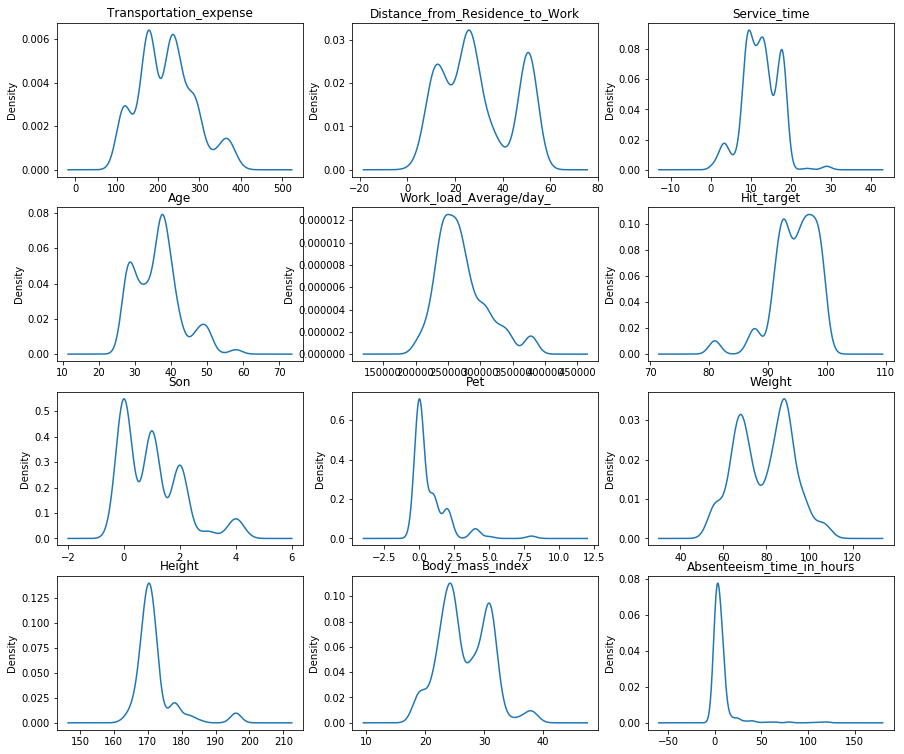

In [61]:
#Density plot for numerical variables
fig, axes = plt.subplots(nrows=4, ncols=3,figsize = (15,13))
absent_train["Transportation_expense"].plot(kind = 'density',ax = axes[0,0],title = 'Transportation_expense')
absent_train["Distance_from_Residence_to_Work"].plot(kind = 'density',ax = axes[0,1],title = 'Distance_from_Residence_to_Work')
absent_train["Service_time"].plot(kind = 'density',ax = axes[0,2],title = 'Service_time')
absent_train["Age"].plot(kind = 'density',ax = axes[1,0],title = 'Age')
absent_train["Work_load_Average/day_"].plot(kind = 'density',ax = axes[1,1],title = 'Work_load_Average/day_')
absent_train["Hit_target"].plot(kind = 'density',ax = axes[1,2],title = 'Hit_target')
absent_train["Son"].plot(kind = 'density',ax = axes[2,0],title = 'Son')
absent_train["Pet"].plot(kind = 'density',ax = axes[2,1],title = 'Pet')
absent_train["Weight"].plot(kind = 'density',ax = axes[2,2],title = 'Weight')
absent_train["Height"].plot(kind = 'density',ax = axes[3,0],title = 'Height')
absent_train["Body_mass_index"].plot(kind = 'density',ax = axes[3,1],title =  'Body_mass_index')
absent_train["Absenteeism_time_in_hours"].plot(kind = 'density',ax = axes[3,2],title = 'Absenteeism_time_in_hours')

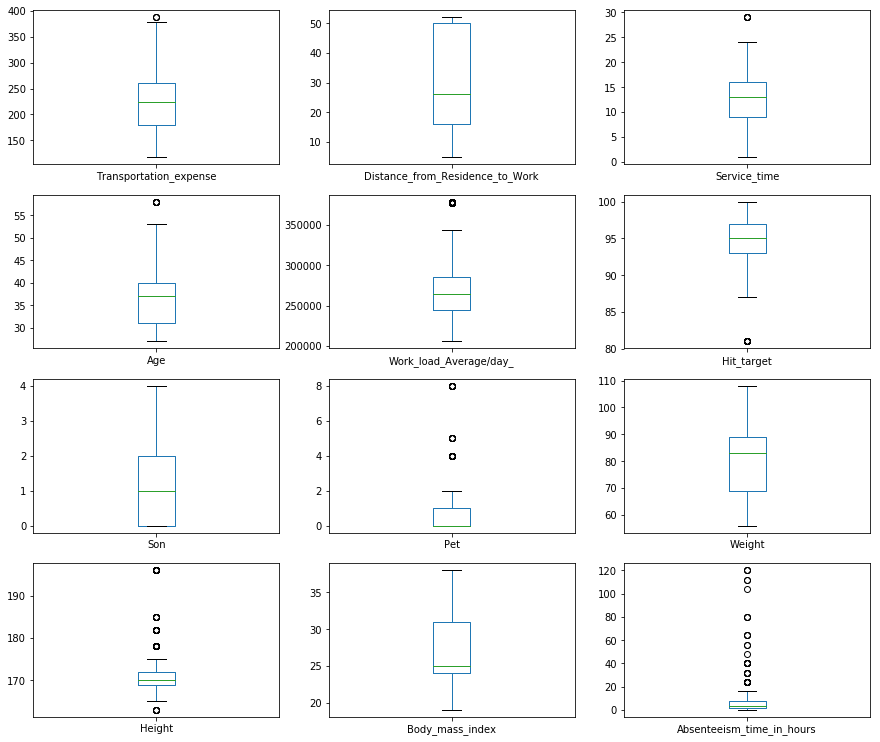

In [62]:
fig, axes = plt.subplots(nrows=4, ncols=3,figsize = (15,13))
absent_train["Transportation_expense"].plot(kind = 'box',ax = axes[0,0])
absent_train["Distance_from_Residence_to_Work"].plot(kind = 'box',ax = axes[0,1])
absent_train["Service_time"].plot(kind = 'box',ax = axes[0,2])
absent_train["Age"].plot(kind = 'box',ax = axes[1,0])
absent_train["Work_load_Average/day_"].plot(kind = 'box',ax = axes[1,1])
absent_train["Hit_target"].plot(kind = 'box',ax = axes[1,2])
absent_train["Son"].plot(kind = 'box',ax = axes[2,0])
absent_train["Pet"].plot(kind = 'box',ax = axes[2,1])
absent_train["Weight"].plot(kind = 'box',ax = axes[2,2])
absent_train["Height"].plot(kind = 'box',ax = axes[3,0])
absent_train["Body_mass_index"].plot(kind = 'box',ax = axes[3,1])
absent_train["Absenteeism_time_in_hours"].plot(kind = 'box',ax = axes[3,2])

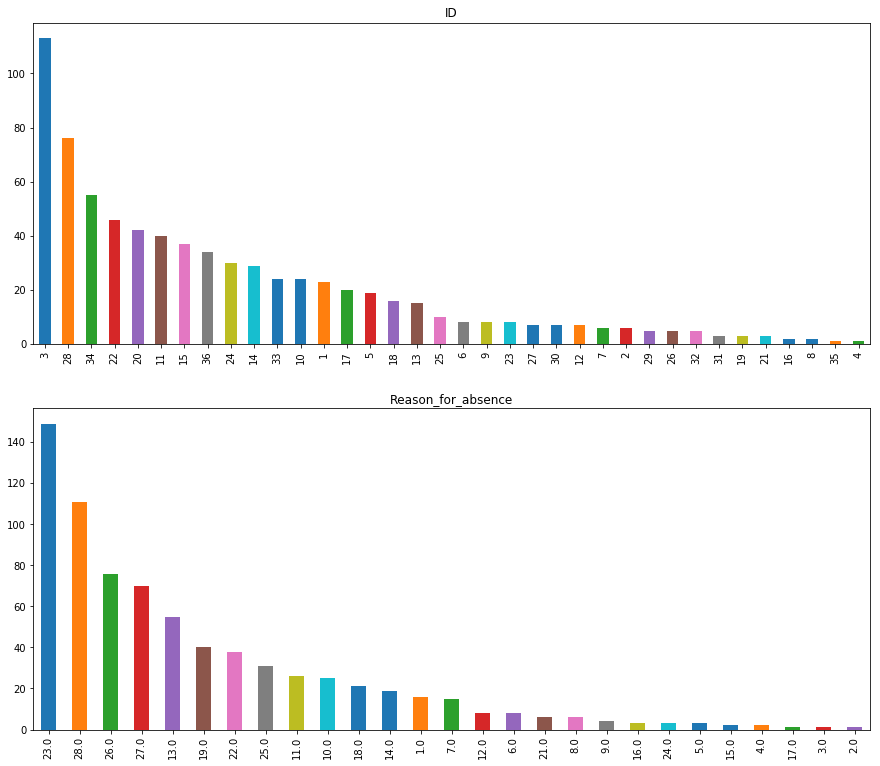

In [63]:
#Categorical variable univariate analysis
fig,axes = plt.subplots(nrows = 2,ncols = 1,figsize = (15,13))
absent_train["ID"].value_counts().plot(kind = 'bar',title ='ID' ,ax = axes[0])
absent_train["Reason_for_absence"].value_counts().plot(kind = 'bar',title = 'Reason_for_absence' ,ax = axes[1])


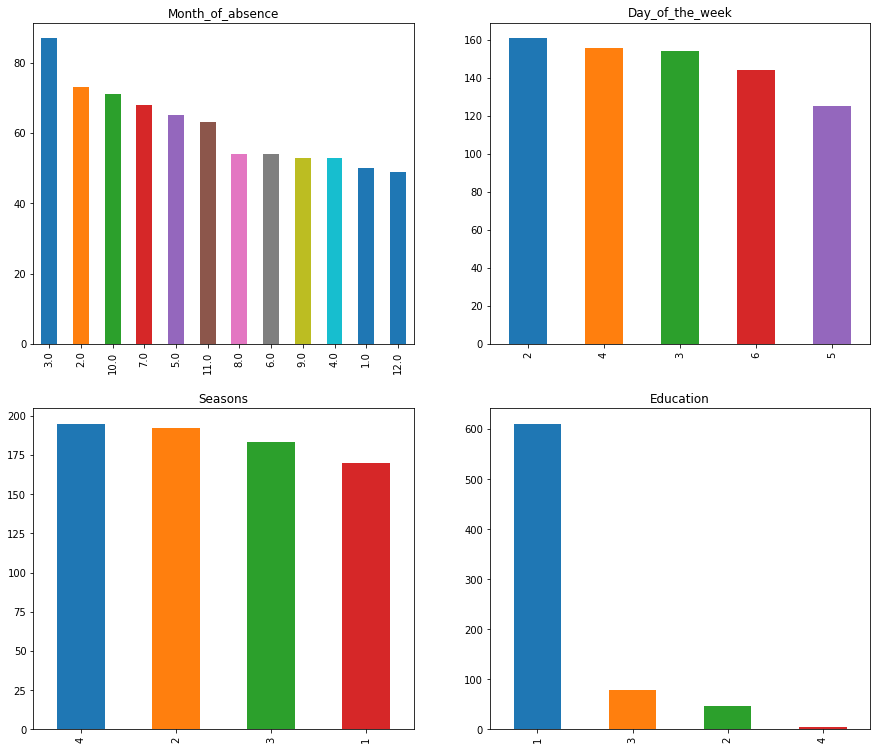

In [64]:
fig,axes = plt.subplots(nrows = 2,ncols = 2,figsize = (15,13))
absent_train["Month_of_absence"].value_counts().plot(kind = 'bar',title = 'Month_of_absence' ,ax = axes[0,0])
absent_train["Day_of_the_week"].value_counts().plot(kind = 'bar',title ='Day_of_the_week' ,ax = axes[0,1])
absent_train["Seasons"].value_counts().plot(kind = 'bar',title = 'Seasons' ,ax = axes[1,0])
absent_train["Education"].value_counts().plot(kind = 'bar',title = 'Education',ax = axes[1,1])


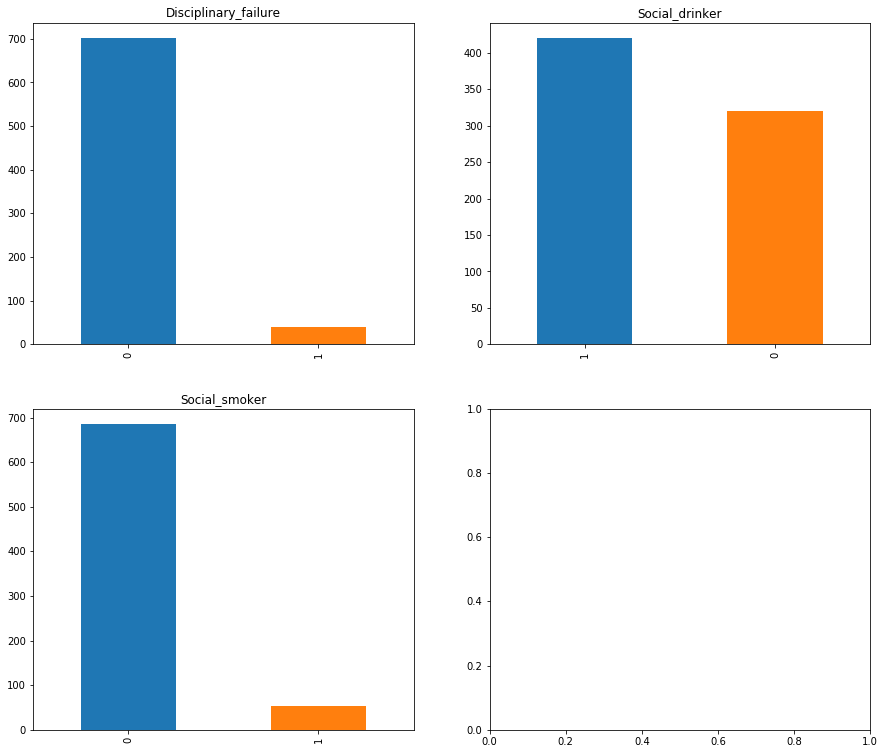

In [65]:
fig,axes = plt.subplots(nrows = 2,ncols = 2,figsize = (15,13))
absent_train["Disciplinary_failure"].value_counts().plot(kind = 'bar',title ='Disciplinary_failure' ,ax = axes[0,0])
absent_train["Social_drinker"].value_counts().plot(kind = 'bar',title = 'Social_drinker' ,ax = axes[0,1])
absent_train["Social_smoker"].value_counts().plot(kind = 'bar',title = 'Social_smoker' ,ax = axes[1,0])


In [66]:
#Bivariate analysis
# visualization of Mean Absenteesim time in hours per category
def cat_show(x):
    df = absent_train.groupby(x)["Absenteeism_time_in_hours"].mean()
    return df.plot.bar(legend = True,figsize = (8,4))



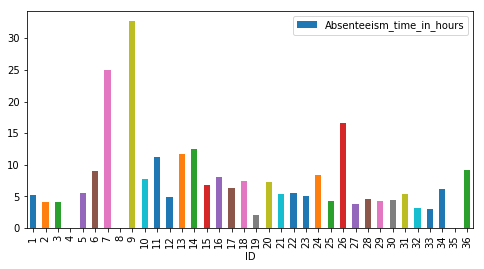

In [67]:
cat_show("ID")

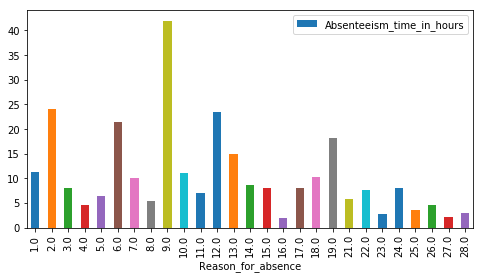

In [68]:
cat_show("Reason_for_absence")

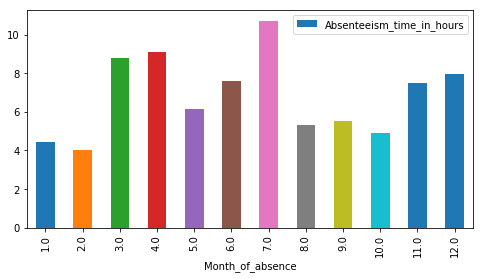

In [69]:
cat_show("Month_of_absence")

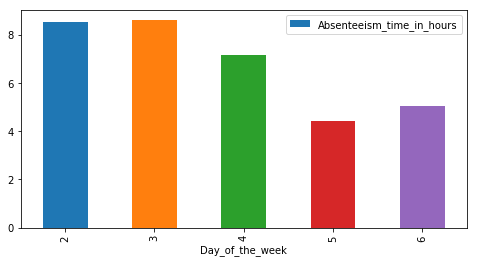

In [70]:
cat_show("Day_of_the_week")

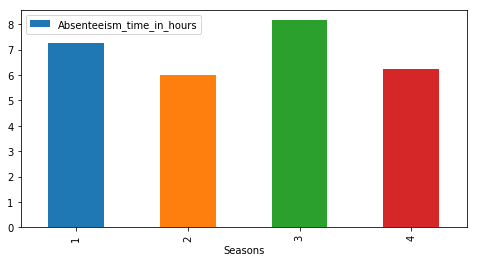

In [71]:
cat_show("Seasons")

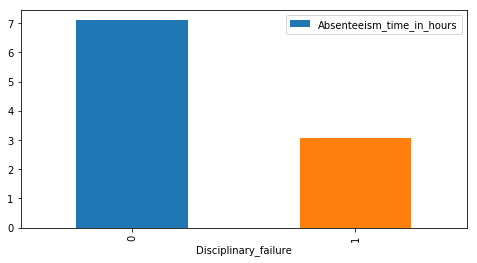

In [72]:
cat_show("Disciplinary_failure")

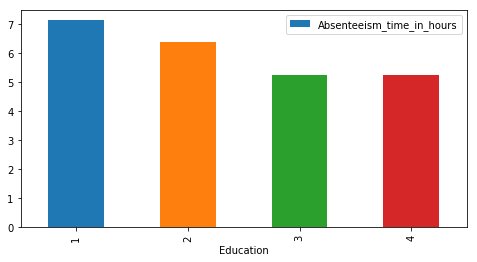

In [73]:
cat_show("Education")

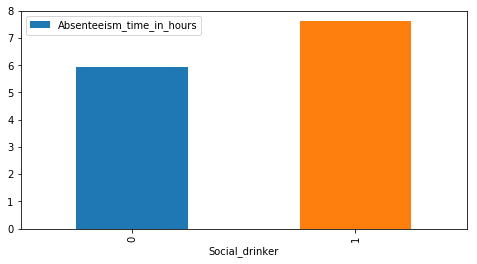

In [74]:
cat_show("Social_drinker")

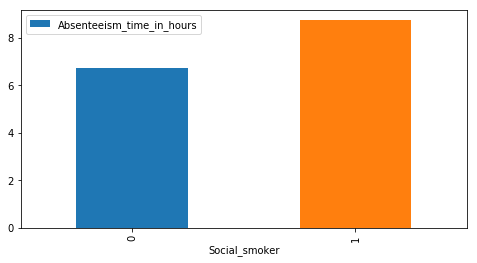

In [75]:
cat_show("Social_smoker")

# Outlier Analysis

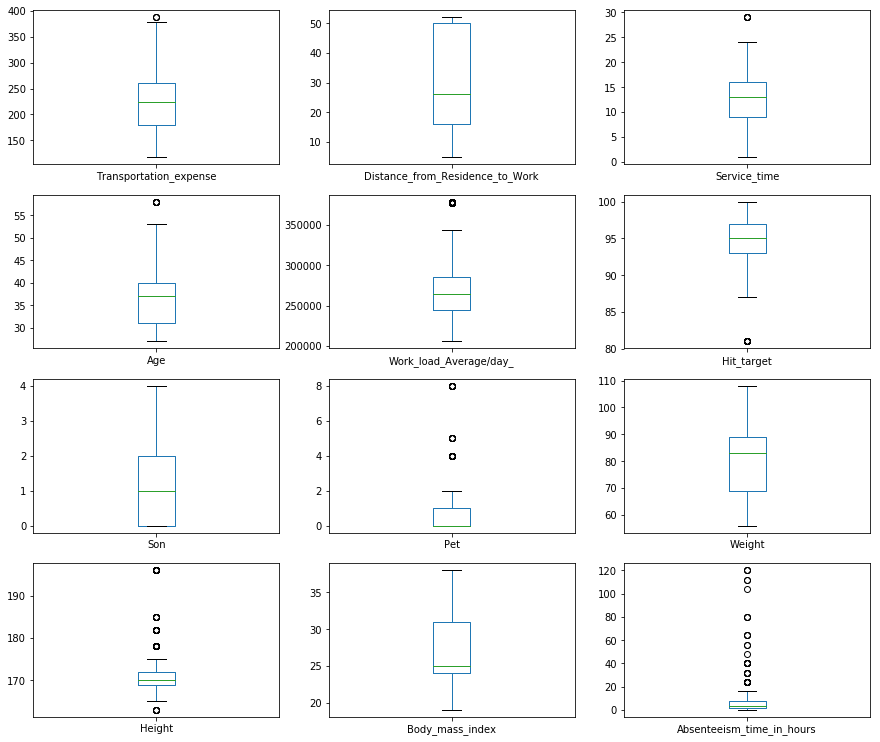

In [76]:
#Plot boxplot to visualize outlier in each numerical variable
fig, axes = plt.subplots(nrows=4, ncols=3,figsize = (15,13))
absent_train["Transportation_expense"].plot(kind = 'box',ax = axes[0,0])
absent_train["Distance_from_Residence_to_Work"].plot(kind = 'box',ax = axes[0,1])
absent_train["Service_time"].plot(kind = 'box',ax = axes[0,2])
absent_train["Age"].plot(kind = 'box',ax = axes[1,0])
absent_train["Work_load_Average/day_"].plot(kind = 'box',ax = axes[1,1])
absent_train["Hit_target"].plot(kind = 'box',ax = axes[1,2])
absent_train["Son"].plot(kind = 'box',ax = axes[2,0])
absent_train["Pet"].plot(kind = 'box',ax = axes[2,1])
absent_train["Weight"].plot(kind = 'box',ax = axes[2,2])
absent_train["Height"].plot(kind = 'box',ax = axes[3,0])
absent_train["Body_mass_index"].plot(kind = 'box',ax = axes[3,1])
absent_train["Absenteeism_time_in_hours"].plot(kind = 'box',ax = axes[3,2])

In [77]:
cnames

['Transportation_expense',
 'Distance_from_Residence_to_Work',
 'Service_time',
 'Age',
 'Work_load_Average/day_',
 'Hit_target',
 'Son',
 'Pet',
 'Weight',
 'Height',
 'Body_mass_index',
 'Absenteeism_time_in_hours']

In [78]:
#Detect and replace with NA
for i in cnames:
    # #Extract quartiles
    q75, q25 = np.percentile(absent_train[i],[75,25])
    # #Calculate IQR
    iqr = q75 - q25

    # #Calculate inner and outer fence
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
    # #Replace with NA
    absent_train.loc[absent_train[i] < minimum,i] = np.nan
    absent_train.loc[absent_train[i] > maximum,i] = np.nan

In [79]:
#Checking total missing value in each column resulting due to outlier
absent_train.isnull().sum()

ID                                   0
Reason_for_absence                   0
Month_of_absence                     0
Day_of_the_week                      0
Seasons                              0
Transportation_expense               3
Distance_from_Residence_to_Work      0
Service_time                         5
Age                                  8
Work_load_Average/day_              31
Hit_target                          19
Disciplinary_failure                 0
Education                            0
Son                                  0
Social_drinker                       0
Social_smoker                        0
Pet                                 46
Weight                               0
Height                             119
Body_mass_index                      0
Absenteeism_time_in_hours           43
dtype: int64

In [80]:
##Impute with KNN
absent_train = pd.DataFrame(KNN(k = 3).fit_transform(absent_train), columns = absent_train.columns)

Imputing row 1/740 with 0 missing, elapsed time: 0.635
Imputing row 101/740 with 1 missing, elapsed time: 0.639
Imputing row 201/740 with 1 missing, elapsed time: 0.643
Imputing row 301/740 with 0 missing, elapsed time: 0.651
Imputing row 401/740 with 0 missing, elapsed time: 0.654
Imputing row 501/740 with 0 missing, elapsed time: 0.657
Imputing row 601/740 with 0 missing, elapsed time: 0.661
Imputing row 701/740 with 0 missing, elapsed time: 0.665


In [81]:
absent_train.isnull().sum()

ID                                 0
Reason_for_absence                 0
Month_of_absence                   0
Day_of_the_week                    0
Seasons                            0
Transportation_expense             0
Distance_from_Residence_to_Work    0
Service_time                       0
Age                                0
Work_load_Average/day_             0
Hit_target                         0
Disciplinary_failure               0
Education                          0
Son                                0
Social_drinker                     0
Social_smoker                      0
Pet                                0
Weight                             0
Height                             0
Body_mass_index                    0
Absenteeism_time_in_hours          0
dtype: int64

In [82]:
#Store clean file into the system
absent_train.to_csv("clean_file.csv",index = False)

# Feature Selection

In [83]:
##Correlation analysis
#Correlation plot
df_corr = absent_train.loc[:,cnames]

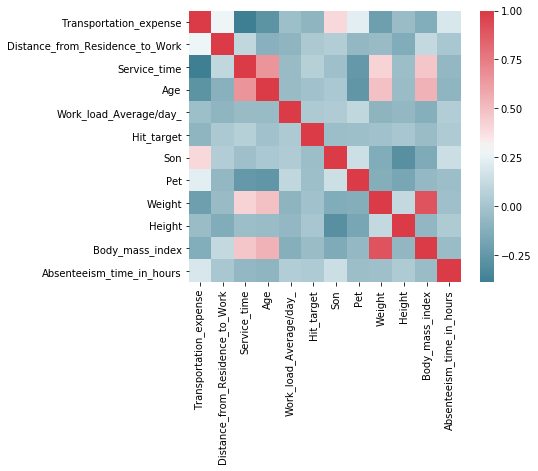

In [84]:
#Set the width and height of the plot
f, ax = plt.subplots(figsize=(7, 5))#figsize=(height,width)

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [85]:
#Dimension reduction
absent_train = absent_train.drop("Body_mass_index", axis=1)
absent_train.shape

(740, 20)

In [86]:
absent_train.shape

(740, 20)

In [87]:
#update numerical variable list
cnames.remove("Body_mass_index")

# Feature scaling

(array([ 93.,   0.,  36., 187.,   8.,   0., 156.,  56.,  45.,  91.,   5.,
          0.,  16.,   0.,  47.]),
 array([117.99999524, 135.33332889, 152.66666254, 169.99999619,
        187.33332984, 204.66666349, 221.99999714, 239.3333308 ,
        256.66666445, 273.9999981 , 291.33333175, 308.6666654 ,
        325.99999905, 343.3333327 , 360.66666635, 378.        ]),
 <a list of 15 Patch objects>)

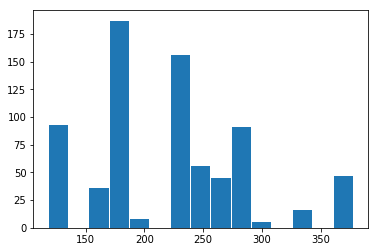

In [88]:
#Normality check
%matplotlib inline  
plt.hist(absent_train['Transportation_expense'], bins='auto',rwidth = 0.95)

In [89]:
cnames.remove("Absenteeism_time_in_hours")

In [90]:
#Performing normalization as our data is skewed
#Nomalisation
for i in cnames:
    print(i)
    absent_train[i] = (absent_train[i] - np.min(absent_train[i]))/(np.max(absent_train[i]) - np.min(absent_train[i]))

Transportation_expense
Distance_from_Residence_to_Work
Service_time
Age
Work_load_Average/day_
Hit_target
Son
Pet
Weight
Height


In [91]:
#check datatype of variables
absent_train.dtypes

ID                                 float64
Reason_for_absence                 float64
Month_of_absence                   float64
Day_of_the_week                    float64
Seasons                            float64
Transportation_expense             float64
Distance_from_Residence_to_Work    float64
Service_time                       float64
Age                                float64
Work_load_Average/day_             float64
Hit_target                         float64
Disciplinary_failure               float64
Education                          float64
Son                                float64
Social_drinker                     float64
Social_smoker                      float64
Pet                                float64
Weight                             float64
Height                             float64
Absenteeism_time_in_hours          float64
dtype: object

In [92]:
cnames.append("Absenteeism_time_in_hours")

In [93]:
#conversion of datatype of variable 
for i in cat_names:
    absent_train[i] = absent_train[i].astype(object)

#Numerical variable list
for i in cnames:
    absent_train[i] = absent_train[i].astype(int)

#Checking datatypes of variables
absent_train.dtypes

ID                                 object
Reason_for_absence                 object
Month_of_absence                   object
Day_of_the_week                    object
Seasons                            object
Transportation_expense              int32
Distance_from_Residence_to_Work     int32
Service_time                        int32
Age                                 int32
Work_load_Average/day_              int32
Hit_target                          int32
Disciplinary_failure               object
Education                          object
Son                                 int32
Social_drinker                     object
Social_smoker                      object
Pet                                 int32
Weight                              int32
Height                              int32
Absenteeism_time_in_hours           int32
dtype: object

In [94]:
#Summary of variables
absent_train.describe()

,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,Hit_target,Son,Pet,Weight,Height,Absenteeism_time_in_hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,0.010811,0.032432,0.002703,0.001351,0.039189,0.014865,0.056757,0.001351,0.006757,0.001351,4.309459
std,0.103481,0.177265,0.051952,0.036761,0.194176,0.121094,0.231534,0.036761,0.081977,0.036761,3.409398
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000


In [95]:
#Create a dataframe of categorical variables
data_cat = absent_train.drop(cnames,axis = 1)

In [96]:
##Create dummies for categorical variables
data = pd.get_dummies(data_cat,columns = cat_names)
#Create dataframe of numerical varibles
data_num = absent_train[cnames]
#Join dummy categorical variables and numerical variables in new object
data = data.join(data_num)

In [97]:
#dimension of dataset
data.shape

(740, 105)

# Principal Component Analysis

In [98]:
#Import library for PCA
from sklearn.decomposition import PCA

In [99]:
#Get the data for PCA except target variable as pca is unsupervised technique
train = data.iloc[:,:104]
#Get the target variable
target = data['Absenteeism_time_in_hours']

In [100]:
#As we have 104 variable, hence no of principal component = 104
pca = PCA(n_components=104)
pca.fit(train)

PCA(copy=True, iterated_power='auto', n_components=104, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

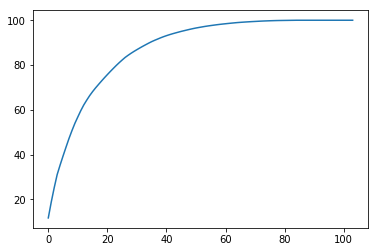

In [101]:
#Proportion of variance explained
var= pca.explained_variance_ratio_
#Cumulative scree plot
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(var1)
plt.show()

In [102]:
#selecting first 45 principal component as 95%+ variance is explained by them
pca = PCA(n_components=45)
train = pca.fit(train).transform(train)

In [103]:
#Import Libraries for splitting the dataset
from sklearn.model_selection import train_test_split

In [104]:
#splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(train,target, test_size=0.2)

# Model Building and Evaluation

## Decision Tree Regressor

In [105]:
#Import library for decision tree regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import *

In [106]:
#Decision tree for regression
fit_DT = DecisionTreeRegressor(max_depth = 2).fit(X_train,y_train)
#Apply model on test data
predictions_DT = fit_DT.predict(X_test)
#Define root mean squared error formula
def RMSE(y_true,y_pred):
    rmse = np.sqrt(mean_squared_error(y_true,y_pred))
    return rmse

In [107]:
#Root mean squared error
RMSE(y_test,predictions_DT)

3.1981850026877305

In [108]:
#R_squared
r2_score(y_test,predictions_DT)

0.12533927389918398

In [109]:
##Results
#RMSE = 3.15
#RSquared = 3.99

## Random Forest 

In [110]:
# Importing libraries for Random Forest
from sklearn.ensemble import RandomForestRegressor

In [111]:
#Build random forest using RandomForestRegressor
RF_model = RandomForestRegressor(n_estimators = 500).fit(X_train,y_train)

#Perdict for test cases
RF_predictions = RF_model.predict(X_test)

In [112]:
#Root mean squared error
RMSE(y_test,RF_predictions)

2.986872315469671

In [113]:
#R_squared
r2_score(y_test,RF_predictions)

0.23710322923370408

In [114]:
##Results
#RMSE = 2.80
#RSquared = 23.83

## Linear Regression

In [115]:
#Import library for linear regression
from sklearn.linear_model import LinearRegression

In [116]:
#Building linear regression model with ordinary least square method
ols = LinearRegression()
ols_model = ols.fit(X_train, y_train)
#predict for test cases
predictions_LR = ols_model.predict(X_test)

In [117]:
#Root mean squared error
RMSE(y_test,predictions_LR)

2.7148072697227037

In [118]:
#R_squared
r2_score(y_test,predictions_LR)

0.3697534623688792

In [119]:
##Results
#RMSE = 2.73
#RSquared = 27.97

In [120]:
#Building second linear regression model with square root transformation of dependent variable to improve normality and linear relationship
ols = LinearRegression()
ols_model2 = ols.fit(X_train, np.sqrt(y_train))
#predict for test cases
predictions_LR = (ols_model2.predict(X_test))**2

In [121]:
#Root mean squared error
RMSE(y_test,predictions_LR)

2.686058390444444

In [122]:
#R_squared
r2_score(y_test,predictions_LR)

0.3830309759892181

In [123]:
##Results
#RMSE = 2.70
#RSquared = 29.44

#### Based on the values of RMSE and Rsquared, Linear Regression gives least value of RMSE and Highest value of Rsquared, Hence we are selection Linear Regression second model to predict for test cases.

# Monthly Work Loss

In [124]:
#Get the clean file
loss = pd.read_csv("clean_file.csv")

In [125]:
loss.head()

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
0,11.0,26.0,7.0,3.0,1.0,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.000000,30.0,4.0
1,36.0,26.0,7.0,3.0,1.0,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,170.000004,31.0,0.0
2,3.0,23.0,7.0,4.0,1.0,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.000000,31.0,2.0
3,7.0,7.0,7.0,5.0,1.0,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.000000,24.0,4.0
4,11.0,23.0,7.0,5.0,1.0,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.000000,30.0,2.0


In [126]:
#variable required to calculate monthly loss
variable = ["Month_of_absence","Service_time","Work_load_Average/day_","Absenteeism_time_in_hours"]

In [127]:
#create dataframe with required variables to calculate monthly loss
Loss_df = loss[variable]

In [128]:
Loss_df.head()

,Month_of_absence,Service_time,Work_load_Average/day_,Absenteeism_time_in_hours
0,7.0,13.0,239554.0,4.0
1,7.0,18.0,239554.0,0.0
2,7.0,18.0,239554.0,2.0
3,7.0,14.0,239554.0,4.0
4,7.0,13.0,239554.0,2.0


### Formular for work loss
$work loss = (Work.load.Average/day/Service.time)*Absenteeism.time.in.hours$


In [129]:
#calculate Monthly loss
Loss_df["Monthly_loss"] = np.round((Loss_df["Work_load_Average/day_"]/Loss_df["Service_time"]) * Loss_df["Absenteeism_time_in_hours"])

C:\Users\vrush_000\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [130]:
Loss_df.head()

,Month_of_absence,Service_time,Work_load_Average/day_,Absenteeism_time_in_hours,Monthly_loss
0,7.0,13.0,239554.0,4.0,73709.0
1,7.0,18.0,239554.0,0.0,0.0
2,7.0,18.0,239554.0,2.0,26617.0
3,7.0,14.0,239554.0,4.0,68444.0
4,7.0,13.0,239554.0,2.0,36854.0


In [131]:
#Total loss per month
loss_2011 = Loss_df.groupby("Month_of_absence")["Monthly_loss"].sum()

In [132]:
loss_2011

Month_of_absence
1.0      4762969.0
2.0      8016724.0
3.0     11004184.0
4.0      6362132.0
5.0      6907091.0
6.0     10426767.0
7.0     11686069.0
8.0      7115842.0
9.0      4486803.0
10.0     7379173.0
11.0     6577900.0
12.0     7725394.0
Name: Monthly_loss, dtype: float64

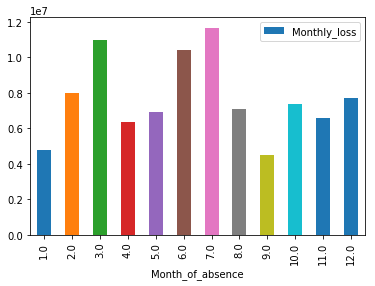

In [133]:
#Visualisation of workloss per month
loss_2011.plot(kind = 'bar',legend = True)